Data analysis workflow example

https://www.youtube.com/watch?v=_ZEWDGpM-vM

In [2]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [4]:
from urllib.request import urlretrieve
urlretrieve(URL,'Freemont.csv')

('Freemont.csv', <http.client.HTTPMessage at 0x7f807c3dc9e8>)

In [5]:
!head Freemont.csv


Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
01/01/2019 12:00:00 AM,0,9
01/01/2019 01:00:00 AM,2,22
01/01/2019 02:00:00 AM,1,11
01/01/2019 03:00:00 AM,1,2
01/01/2019 04:00:00 AM,2,1
01/01/2019 05:00:00 AM,3,1
01/01/2019 06:00:00 AM,4,7
01/01/2019 07:00:00 AM,1,2
01/01/2019 08:00:00 AM,8,9


In [9]:
import pandas as pd
data = pd.read_csv('Freemont.csv',index_col='Date',parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2019-01-01 02:00:00,1.0,11.0
2019-01-01 03:00:00,1.0,2.0
2019-01-01 04:00:00,2.0,1.0


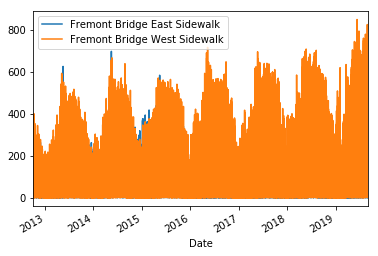

In [10]:
%matplotlib inline
data.plot()

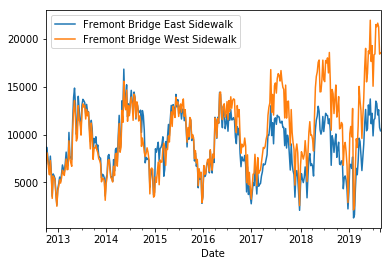

In [11]:
data.resample('W').sum().plot()

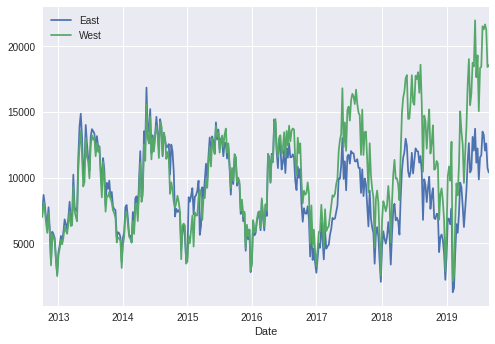

In [14]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.columns=['East','West']
data.resample('W').sum().plot()

(0, 1163374.15)

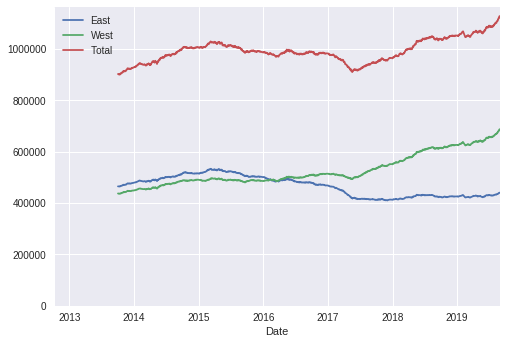

In [17]:
data['Total']=data['East']+data['West']

ax=data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

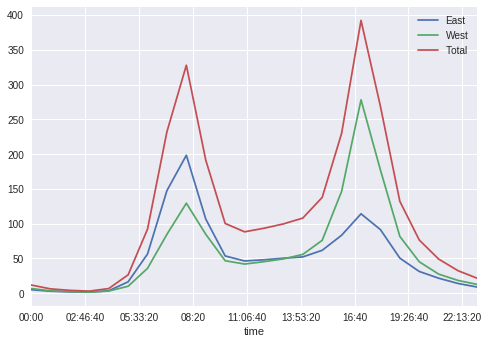

In [18]:
data.groupby(data.index.time).mean().plot();

In [19]:
pivoted = data.pivot_table('Total',index=data.index.time,columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


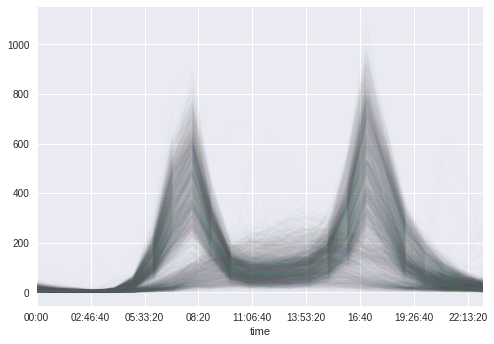

In [22]:
pivoted.plot(legend=False,alpha=0.01);